<a href="https://colab.research.google.com/github/JaganFoundr/Binary_Classification/blob/main/torch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#importing libraries
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

In [35]:
#device
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [50]:
#creating dataset
n_samples=10000
x,y=make_circles(n_samples,noise=0.02, random_state=42)

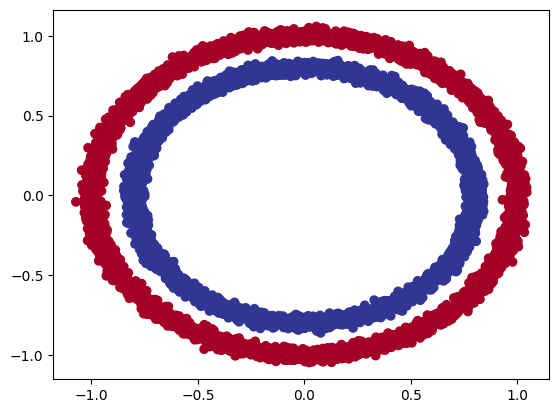

In [51]:
#visualising the plot of out dataset
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], y=x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [52]:
#making x and y from numpy to tensors and putting it inside the device
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

x,y=x.to(device), y.to(device)

In [53]:
#splitting the dataset into training data and validation data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=34)

In [54]:
#model building
class BinaryModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear1=nn.Linear(in_features=2, out_features=10)
    self.linear2=nn.Linear(in_features=10, out_features=10)
    self.linear3=nn.Linear(in_features=10, out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    out1=self.linear1(x)
    f1=self.relu(out1)

    out2=self.linear2(f1)
    f2=self.relu(out2)

    out3=self.linear3(f2)
    return out3

torch.manual_seed(42)
torch.cuda.manual_seed(32)

model=BinaryModel().to(device)

In [55]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('linear1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('linear2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [56]:
#loss function
loss_function=nn.BCEWithLogitsLoss()

In [57]:
#optimizer
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [58]:
#accuracy function
def accuracy(output, labels):
  probs=torch.sigmoid(output)
  pred=(probs>0.5).float()
  return torch.sum(pred==labels).item()/len(labels)*100


Before Training: 


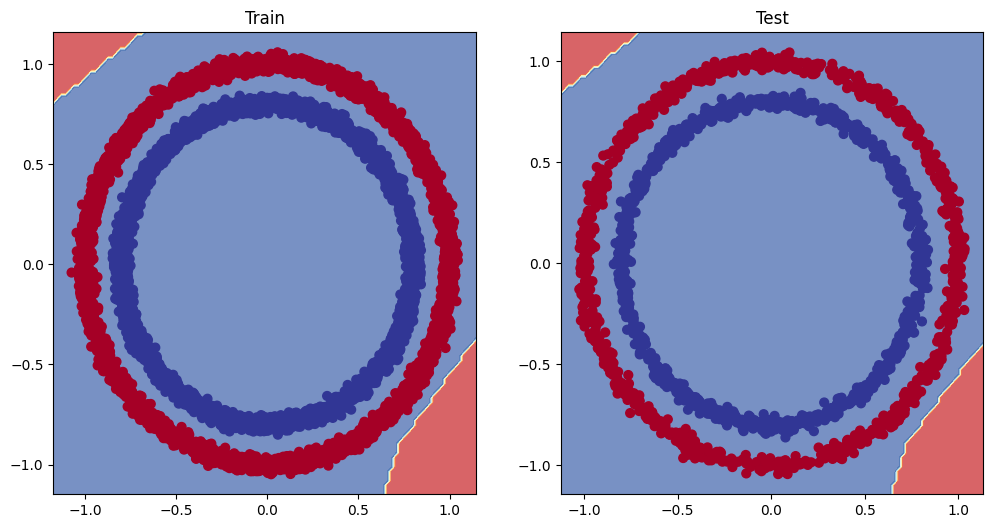

In [59]:
#using helper functions
import requests
from pathlib  import Path

if Path("helper_functions.py").is_file():
  print("")
  print("Before Training: ")
else:
  print("downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)


Epoch 10/100: Train Loss = 0.6872, Test Loss = 0.6854
Train Accuracy: 53.00%, Test Accuracy: 54.55%

Epoch 20/100: Train Loss = 0.6777, Test Loss = 0.6744
Train Accuracy: 53.95%, Test Accuracy: 56.00%

Epoch 30/100: Train Loss = 0.6621, Test Loss = 0.6565
Train Accuracy: 57.25%, Test Accuracy: 59.90%

Epoch 40/100: Train Loss = 0.6352, Test Loss = 0.6282
Train Accuracy: 64.40%, Test Accuracy: 68.10%

Epoch 50/100: Train Loss = 0.5905, Test Loss = 0.5849
Train Accuracy: 78.05%, Test Accuracy: 78.15%

Epoch 60/100: Train Loss = 0.5240, Test Loss = 0.5205
Train Accuracy: 82.51%, Test Accuracy: 82.10%

Epoch 70/100: Train Loss = 0.4380, Test Loss = 0.4326
Train Accuracy: 90.41%, Test Accuracy: 90.70%

Epoch 80/100: Train Loss = 0.3406, Test Loss = 0.3298
Train Accuracy: 95.64%, Test Accuracy: 95.95%

Epoch 90/100: Train Loss = 0.2438, Test Loss = 0.2307
Train Accuracy: 98.04%, Test Accuracy: 98.55%

Epoch 100/100: Train Loss = 0.1659, Test Loss = 0.1567
Train Accuracy: 99.89%, Test Accura

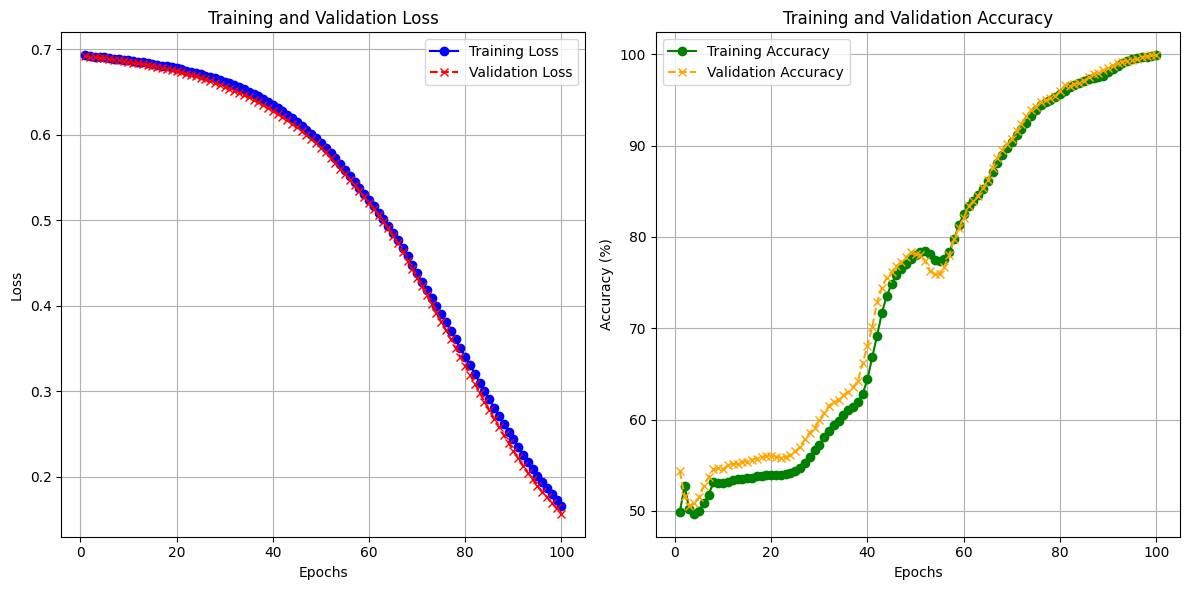

In [60]:
nepochs = 100
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(nepochs):
    # Training phase
    model.train()
    y_train_pred = model(x_train)
    train_loss = loss_function(y_train_pred, y_train.unsqueeze(-1))
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Evaluation phase
    model.eval()
    with torch.inference_mode():
        y_test_pred = model(x_test)
        test_loss = loss_function(y_test_pred, y_test.unsqueeze(-1))

    # Compute accuracy
    train_acc = accuracy(y_train_pred, y_train.unsqueeze(-1))
    test_acc = accuracy(y_test_pred, y_test.unsqueeze(-1))

    # Store metrics
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Print metrics every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"\nEpoch {epoch+1}/{nepochs}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")
        print(f"Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%")

# Plotting
epochs = range(1, nepochs + 1)

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Training Loss", color='blue', marker='o')
plt.plot(epochs, test_losses, label="Validation Loss", color='red', linestyle='--', marker='x')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Training Accuracy", color='green', marker='o')
plt.plot(epochs, test_accuracies, label="Validation Accuracy", color='orange', linestyle='--', marker='x')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [61]:
with torch.inference_mode():
  test_pred=model(x_test)

torch.round(torch.sigmoid(test_pred[:10]))

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.]])

In [62]:
y_test[:10]

tensor([0., 1., 0., 1., 1., 0., 1., 1., 0., 0.])

helper_functions.py already exists, skipping download
After Training: 


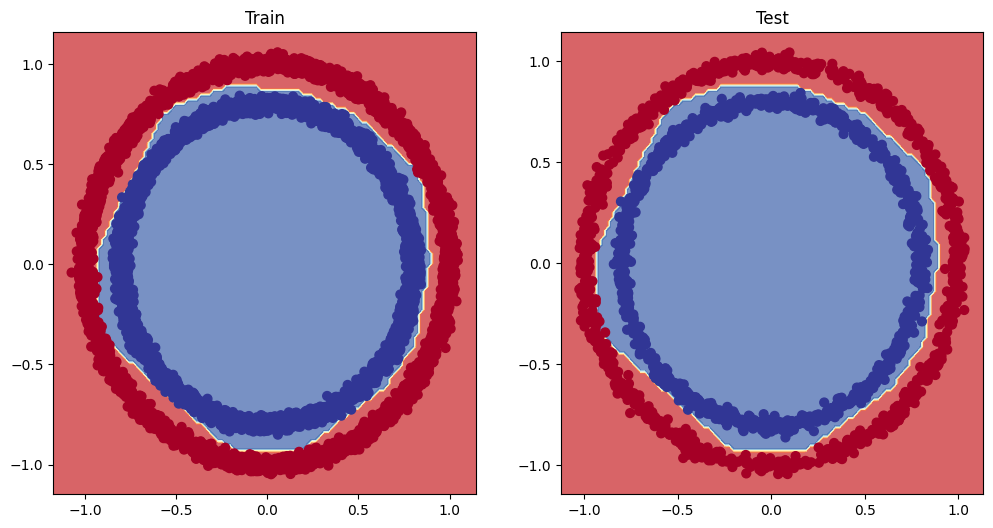

In [64]:
#using helper functions
import requests
from pathlib  import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
  print("After Training: ")
else:
  print("downloading helper_fucntions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)

In [65]:
#saving the model
torch.save(model.state_dict(),"CircleModel.pth")

In [67]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.5001,  1.7476],
                      [-0.9996,  1.3275],
                      [-0.1549,  0.1427],
                      [-1.6399,  0.0019],
                      [-0.0518, -1.7695],
                      [ 1.5406,  0.1851],
                      [ 1.7027, -0.7650],
                      [ 0.3410, -0.0998],
                      [ 0.6695,  1.3492],
                      [-0.3301,  0.1802]])),
             ('linear1.bias',
              tensor([-1.1275, -1.0302, -0.2872, -0.3527, -0.6591, -0.8870, -1.0211, -0.4252,
                      -0.6288, -0.6984])),
             ('linear2.weight',
              tensor([[-0.8188, -1.2080,  0.2441, -0.8063, -1.1109, -0.9770, -1.0680,  0.2555,
                       -0.6422, -0.0997],
                      [ 1.1514,  1.0251,  0.1331,  1.4315,  1.3421,  1.0742,  1.4298,  0.0566,
                        1.2759, -0.1927],
                      [-0.3130, -0.2050, -0.2426,  0.1760,  0.0317,  0.0

In [69]:
saved_model=BinaryModel()
saved_model.load_state_dict(torch.load('CircleModel.pth'))

<ipython-input-69-d6fd8e629b94>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_model.load_state_dict(torch.load('CircleModel.pth'))


<All keys matched successfully>

In [70]:
saved_model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.5001,  1.7476],
                      [-0.9996,  1.3275],
                      [-0.1549,  0.1427],
                      [-1.6399,  0.0019],
                      [-0.0518, -1.7695],
                      [ 1.5406,  0.1851],
                      [ 1.7027, -0.7650],
                      [ 0.3410, -0.0998],
                      [ 0.6695,  1.3492],
                      [-0.3301,  0.1802]])),
             ('linear1.bias',
              tensor([-1.1275, -1.0302, -0.2872, -0.3527, -0.6591, -0.8870, -1.0211, -0.4252,
                      -0.6288, -0.6984])),
             ('linear2.weight',
              tensor([[-0.8188, -1.2080,  0.2441, -0.8063, -1.1109, -0.9770, -1.0680,  0.2555,
                       -0.6422, -0.0997],
                      [ 1.1514,  1.0251,  0.1331,  1.4315,  1.3421,  1.0742,  1.4298,  0.0566,
                        1.2759, -0.1927],
                      [-0.3130, -0.2050, -0.2426,  0.1760,  0.0317,  0.0